# CONNECTTEL CUSTOMER CHURN PREDICTION USING SUPERVISED MACHINE LEARNING.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
# Load the Data set
data = pd.read_csv("Customer-Churn(1).csv")

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Detailed information of our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### The dataset contains a total of 21 columns, 7,043 entries with the TotalCharges in object format.

In [5]:
# Descriptive statistics for numerical features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


### The numerical features indicates tenure has mean value as 32.4, minimum as 0 and maximum as 72. MonthlyCharges has mean 64.8, minimum as 18.3, and maximum as 118.8.TotalCharges has mean of 2280, minimum as 18.8, and maximum as 8684.8 respectively.  The dataset has a total entry of 7,043 in each column except TotalCharges that have 7,032 entry. This shows there are missing values in TotalCharges.

In [6]:
# Desciptive statistics for categorial features
data.describe(include=["object", "bool"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


### The categorical features shows that the dataset has more males, fibre optics topping on the internet service, month to month as the prefered contract term and the electronic check as the highest payment method. Other information as seen from the table above. 

In [7]:
# Check for missing values
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### TotalCharges has 11 missing values and needs to be worked upon.

### No duplicated data.

In [8]:
# Check for duplicate
data.duplicated().sum()

0

# PHASE 1
## EDA

### UNIVARIATE ANALYSIS

In [10]:
data["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

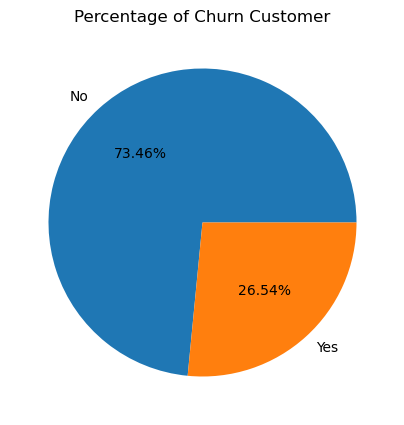

In [11]:
#Percentage of churn customer

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(data["Churn"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of Churn Customer")
plt.show();

### About 27% of the customers in the dataset have churned. This indicate an imbalanced classification problem that requires some feature engineering before building the predictive model.

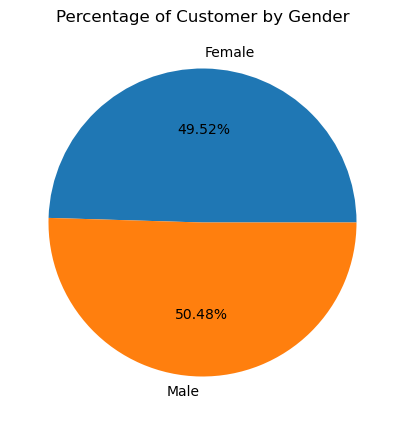

In [12]:
#Percentage of customer Gender

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(data["gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of Customer by Gender")
plt.show();

### The customer gender distribution is approximately equal.

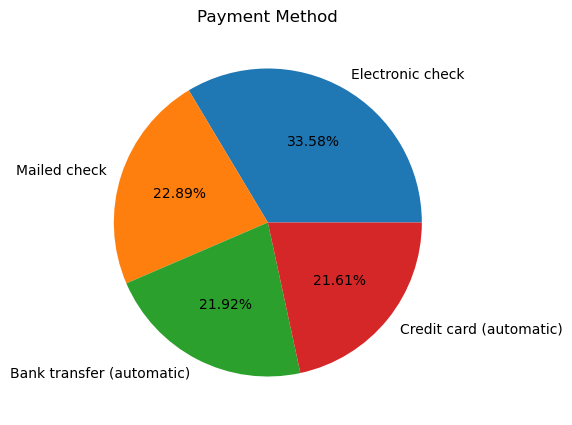

In [13]:
#Payment method by Customers

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(data["PaymentMethod"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Payment Method")
plt.show();

### The most preferred payment method is Electronic Check (34%), followed closely by Mail Check (23%), and then equally by Bank Transfer and Credit Card (both at 22%) respectively.

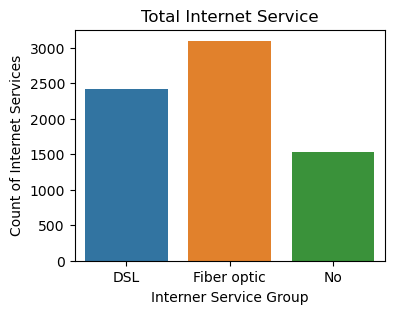

In [14]:
# Internet services

plt.figure(figsize=(4,3))
sns.countplot(x="InternetService", data=data)
plt.xlabel("Interner Service Group")
plt.ylabel("Count of Internet Services")
plt.title("Total Internet Service");

### Most customers use Fiber optic as their Internet service.

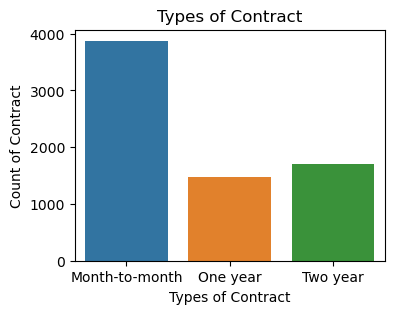

In [15]:
# Contract

plt.figure(figsize=(4,3))
sns.countplot(x="Contract", data=data)
plt.xlabel("Types of Contract")
plt.ylabel("Count of Contract")
plt.title("Types of Contract");

### The dataset reveals that the majority of customers are on a month-to-month subscription plan.

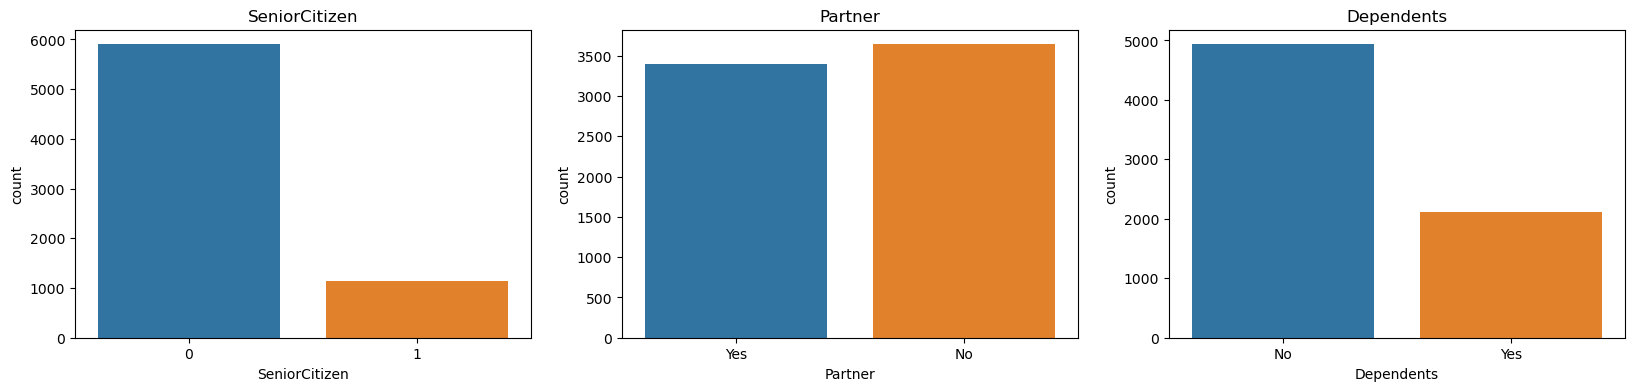

In [16]:
## Data Insights

cols = ["SeniorCitizen","Partner","Dependents"]
numerical = cols

plt.figure(figsize=(20,4))

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(col), data=data)
    ax.set_title(f"{col}")

### The dataset reveals that most customers are senior citizens, with an equal distribution of marital status and no dependents.

### BIVARIATE ANALYSIS

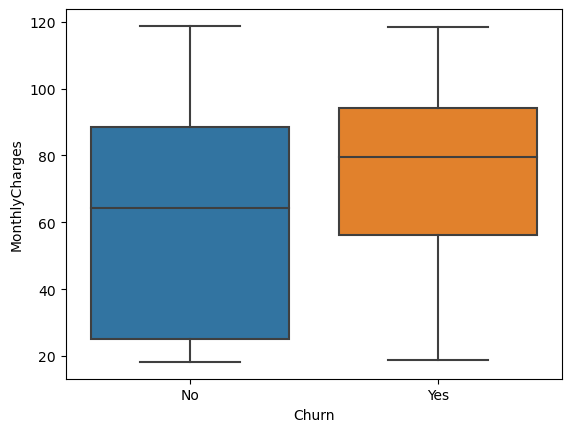

In [17]:
# Relationship between monthly charges and customer churn

sns.boxplot(x="Churn", y="MonthlyCharges", data=data);

### The data reveals that customers who churn have higher average monthly charges compared to those who renew their subscription. This suggests a strong correlation: as monthly charges increase, the likelihood of customers unsubscribing from the network also increases.

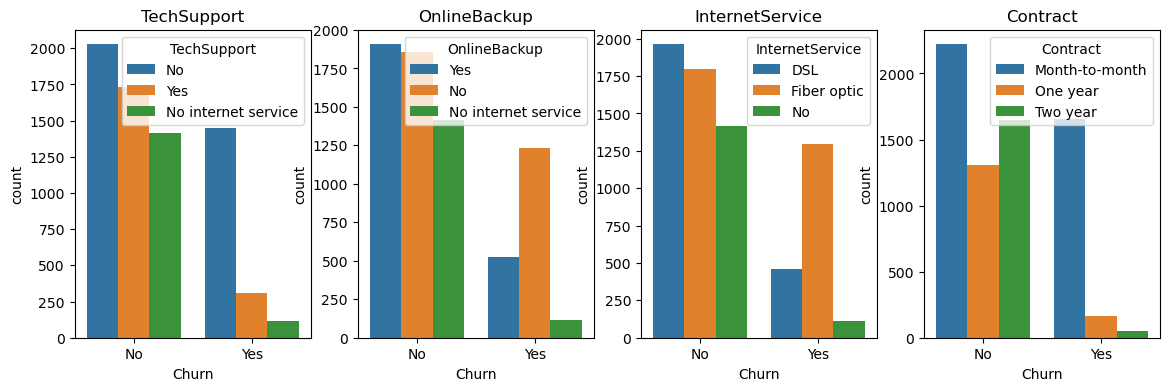

In [18]:
# Relationship between churn and other categorical variables.

cols =["TechSupport", "OnlineBackup", "InternetService","Contract"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x="Churn", hue = str(col), data = data)
    ax.set_title(f"{col}")

### The majority of customers who churned share certain characteristics: they were on a monthly contract plan, used fibre optic internet service, did not have online backup, and had never received technical support.

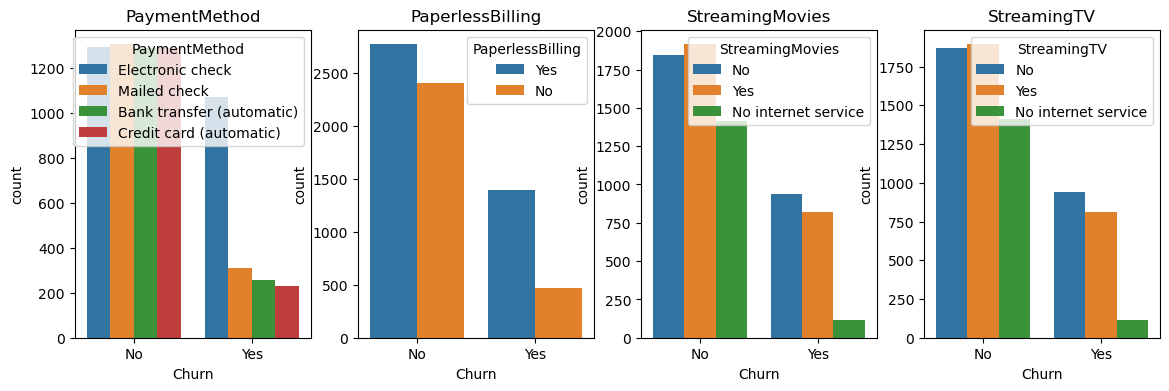

In [19]:
# Relationship between churn and other categorical variables.

cols =["PaymentMethod", "PaperlessBilling", "StreamingMovies","StreamingTV"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x="Churn", hue = str(col), data = data)
    ax.set_title(f"{col}")

### Customers who churned tend to share certain habits: they prefer Electronic Check payments, choose Paperless Billing, and regularly stream movies and TV content.

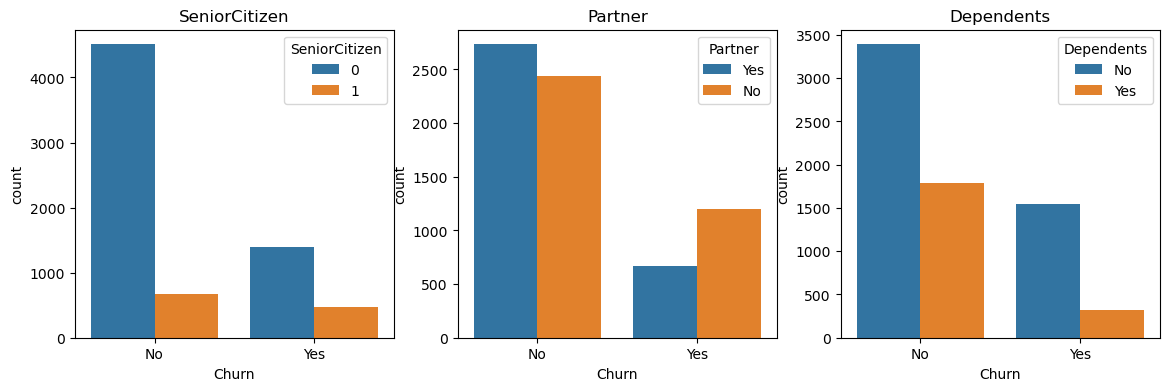

In [20]:
# Relationship between churn and other categorical variables.

cols =["SeniorCitizen", "Partner", "Dependents"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x="Churn", hue = str(col), data = data)
    ax.set_title(f"{col}")

### Customers with partners and dependents have a high churn rate. Additionally, a significant proportion of Senior citizens also churned.

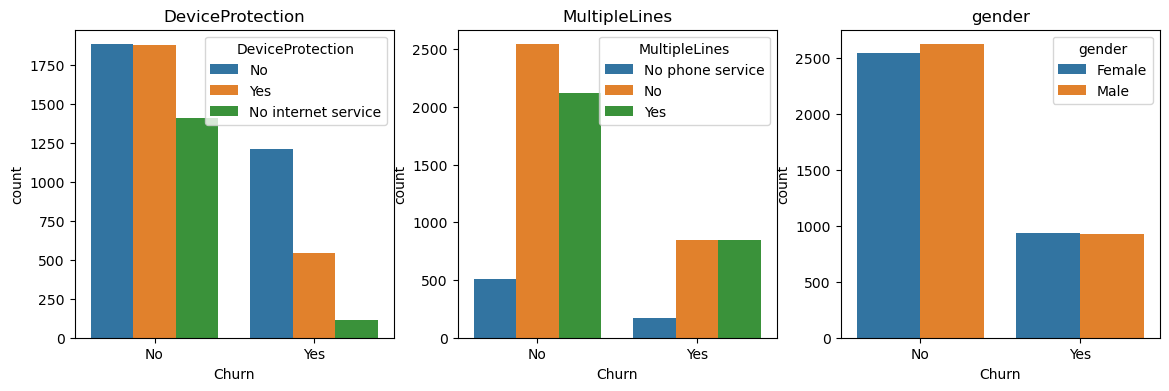

In [21]:
# Relationship between churn and other categorical variables.

cols =["DeviceProtection", "MultipleLines","gender"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x="Churn", hue = str(col), data = data)
    ax.set_title(f"{col}")

### Customers without Device Protection are more likely to churn, regardless of the number of lines and churn rate is equal across genders.

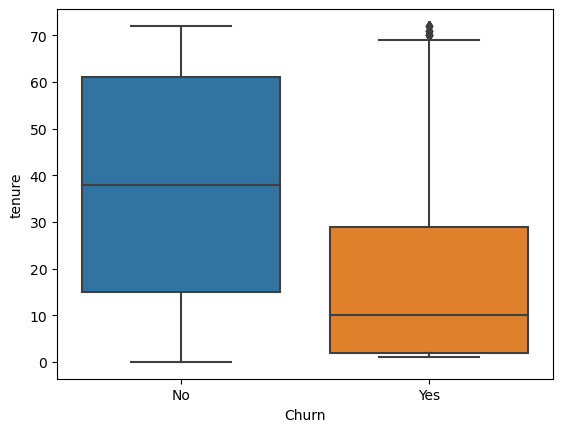

In [22]:
# Relationship between tenure and customer churn

sns.boxplot(x="Churn", y="tenure", data=data);

### Customers with short tenures (0-10 months) have a higher churn rate, and there are also outliers who churn despite having longer tenures.

In [40]:

total_summation = data["TotalCharges"].sum()
print(total_summation)

16056168.7


## FEATURE ENGINEERING

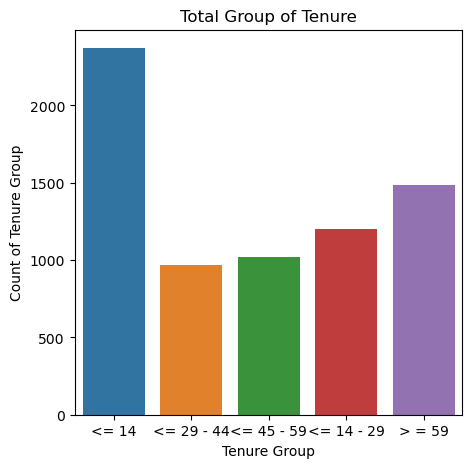

In [23]:
#Grouping of tenure into buckets
def group_tenure(x):
    if x <= 14:
        return "<= 14"
    elif x <= 29:
        return "<= 14 - 29"
    elif x <= 44:
        return "<= 29 - 44"
    elif x <= 59:
         return "<= 45 - 59"
    else:
        return "> = 59"
    
#Apply function to the data
data["group_tenure"] = data["tenure"].apply(group_tenure)
    
# Investigating the tenure group of Staff

plt.figure(figsize=(5,5))
sns.countplot(x="group_tenure", data=data)
plt.xlabel("Tenure Group")
plt.ylabel("Count of Tenure Group")
plt.title("Total Group of Tenure");

### Most customers are new (0 - 14) in the Telecom company and a substantial number who have stayed with the company.

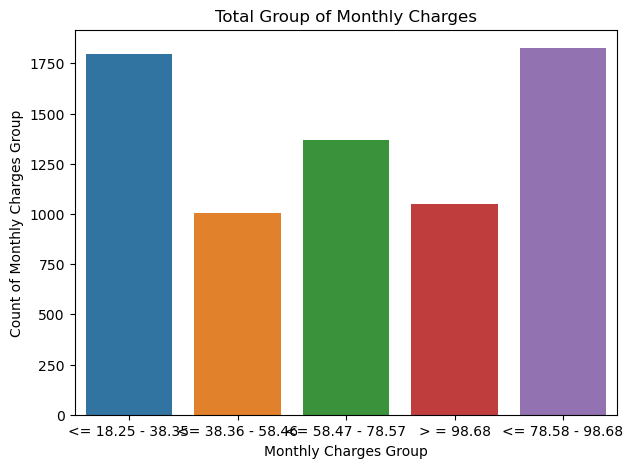

In [24]:
#Grouping of monthly charges into buckets
def group_monthly_charges(x):
    if x <= 38.35:
        return "<= 18.25 - 38.35"
    elif x <= 58.46:
        return "<= 38.36 - 58.46"
    elif x <= 78.57:
        return "<= 58.47 - 78.57"
    elif x <= 98.68:
         return "<= 78.58 - 98.68"
    else:
        return "> = 98.68"
    
#Apply function to the data
data["group_monthly_charges"] = data["MonthlyCharges"].apply(group_monthly_charges)
    
# Investigating the monthly_charges of Staff

plt.figure(figsize=(7,5))
sns.countplot(x="group_monthly_charges", data=data)
plt.xlabel("Monthly Charges Group")
plt.ylabel("Count of Monthly Charges Group")
plt.title("Total Group of Monthly Charges");

### The dataset reveals that most customers that are joining (0 - 38) and those with longer tenure (78 - 98) are on monthly charges.

In [38]:
# Converting the non - numeric values to strings
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

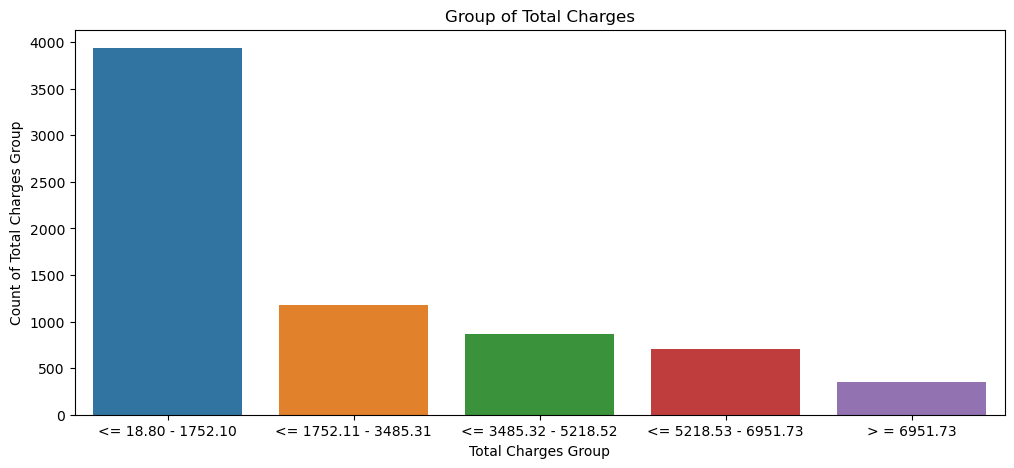

In [26]:
#Grouping of Total charges into buckets
def group_total_charges(x):
    if x <= 1752.10:
        return "<= 18.80 - 1752.10"
    elif x <= 3485.31:
        return "<= 1752.11 - 3485.31"
    elif x <= 5218.52:
        return "<= 3485.32 - 5218.52"
    elif x <= 6951.73:
         return "<= 5218.53 - 6951.73"
    else:
        return "> = 6951.73"
    
#Apply function to the data
data["group_total_charges"] = data["TotalCharges"].apply(group_total_charges)
    
# Investigating the monthly_charges of Staff

plt.figure(figsize=(12,5))
sns.countplot(x="group_total_charges", data=data)
plt.xlabel("Total Charges Group")
plt.ylabel("Count of Total Charges Group")
plt.title("Group of Total Charges");

### Total billing amounts are generally high, between $18 - $1750

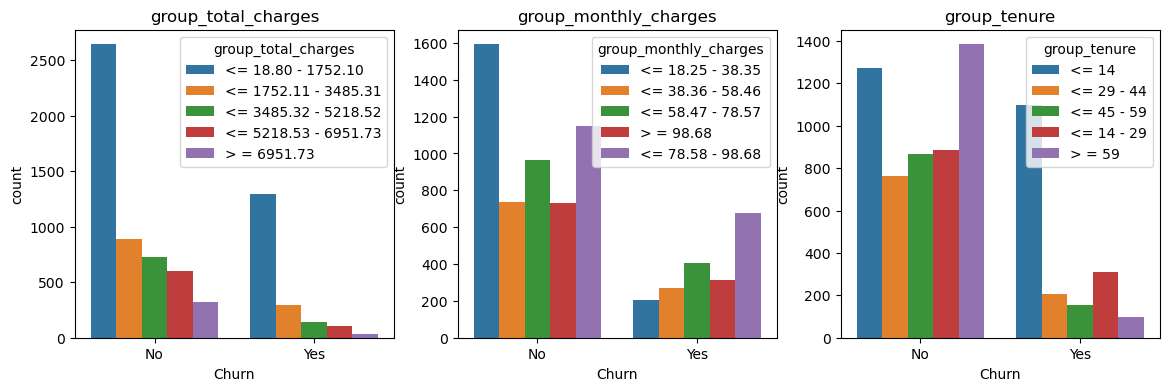

In [27]:
# Relationship between churn and numerical variables.

cols =["group_total_charges", "group_monthly_charges", "group_tenure"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x="Churn", hue = str(col), data = data)
    ax.set_title(f"{col}")

### High-billed customers (USD18 - USD1750) churn faster.
### Customers on monthly charges especially (78 - 98) tend not to renew their subscription.
### Most customers (0 - 14) churn immediately after registration.



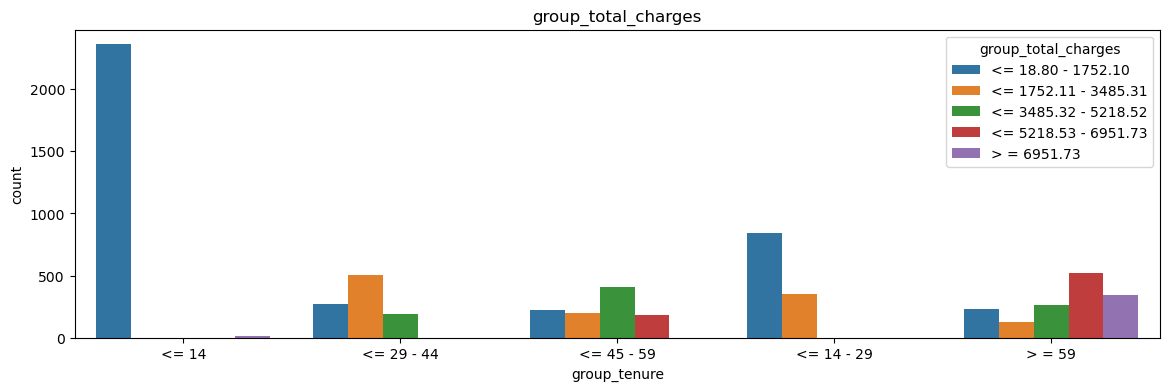

In [28]:
# Relationship between numerical variables; group_total_charges vs group_tenure

cols =["group_total_charges"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x="group_tenure", hue = str(col), data = data)
    ax.set_title(f"{col}")

### Customers billed highly (USD 2,500) tend to stay within 0-14 days.

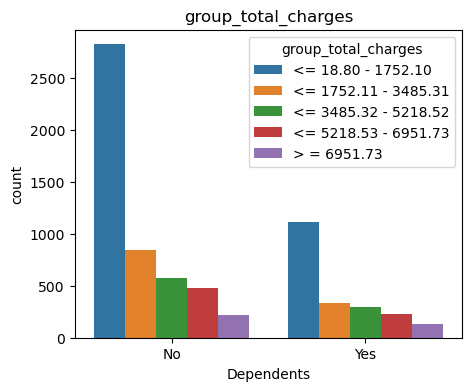

In [29]:
# Relationship between group_total_charges vs Dependents variables.

cols =["group_total_charges"]

plt.figure(figsize=(5,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x="Dependents", hue = str(col), data = data)
    ax.set_title(f"{col}")

### Most dependents on a customer's plan are highly billed, with costs reaching up to USD 2,500

## MULTIVARIATE ANALYSIS

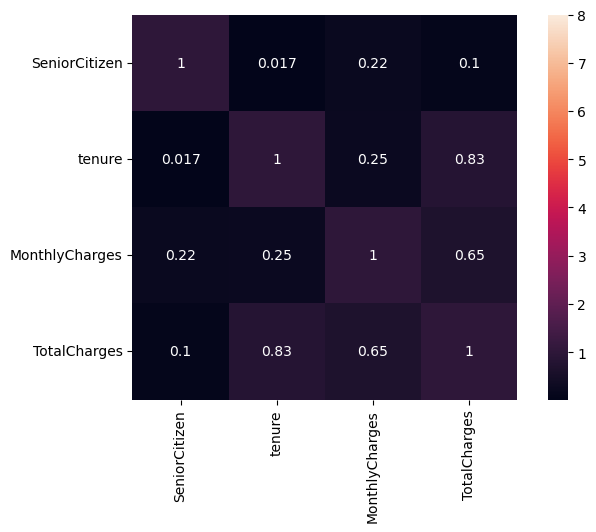

In [30]:
# Correlation between 
numeric_data = data.select_dtypes(include="number")
corr_matrix = numeric_data.corr()
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(corr_matrix,vmax=8, square=True,annot=True);

### There is strong positive correlation between Tenure and Total/Monthly charges.

In [46]:
# Impact of Churn
data["TotalCharges"] = data["TotalCharges"].fillna(data["TotalCharges"].median())
# Calculate the total sum
total_summation = data["TotalCharges"].sum()

# Calculate 26.54% of the total sum of what the company is losing.
quarter_of_total = total_summation * 0.2654
print(quarter_of_total)

4265386.961495


## DATA PREPROCESSING

    CLEANING OF DATA

In [31]:
# Replacing the missing values with median in Total Charges.
data["TotalCharges"] = data["TotalCharges"].fillna(data["TotalCharges"].median())
# Total Charges has been converted to strings earlier.

#encode the categorical features to a numerical features
cat_features = data.drop(["customerID","SeniorCitizen","tenure","MonthlyCharges","TotalCharges"],axis=1)
cat_features.head()   

from sklearn import preprocessing
cat_num = preprocessing.LabelEncoder()
data_cat = cat_features.apply(cat_num.fit_transform)
data_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,group_tenure,group_monthly_charges,group_total_charges
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0,0,1
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,2,1,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0,1,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,3,1,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0,2,1


In [32]:
# Merge both the numerical features and the encoded categorical features
num_features = data[["customerID","SeniorCitizen","tenure","MonthlyCharges","TotalCharges"]]
data_merge = pd.merge(num_features, data_cat, left_index=True, right_index=True)
data_merge.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,group_tenure,group_monthly_charges,group_total_charges
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,0,0,0,1,2,0,0,0,1
1,5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,...,0,0,0,1,0,3,0,2,1,0
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,...,0,0,0,0,1,3,1,0,1,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,...,2,0,0,1,0,0,0,3,1,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,...,0,0,0,0,1,2,1,0,2,1


In [33]:
# Dropping off redundant features
data2 = data_merge.drop(columns=["customerID"])

In [34]:
#segment dataset into data and target label
target = data2.pop("Churn")

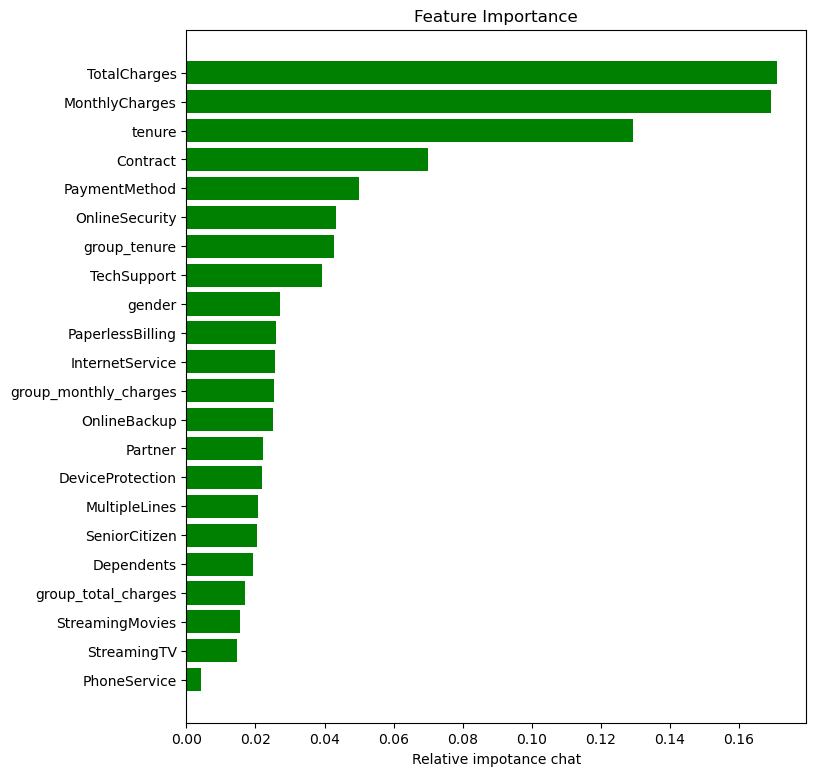

In [35]:
# scale dataset features
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Instantiating the scaler object
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(data2),columns=data2.columns)

#identifying key featurs from the data set
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(df_scaled, target)
importances = model.feature_importances_
sort_imp = np.argsort(importances)
name = list(data2.columns)

#plotting a feature importance chart
plt.figure(figsize=(8,9))
plt.barh(range(len(sort_imp)), importances[sort_imp], color="green")
plt.yticks(range(len(sort_imp)),(name[x] for x in sort_imp))
plt.xlabel("Relative impotance chat")
plt.title("Feature Importance")
plt.show()

### The very important features that influenced churning in the dataset include Total charges, Monthly charges, Tenure and Contract.

## Phase 2: MACHINE LEARNING
    +Splitting data into training and evaluation datasets.
    +Oversampling because the dataset is imbalance.
    +Implementing Machine Learning/model Building and Training.
    +creating a predictions file.

In [36]:
# split the DataFrame into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_scaled, target, test_size=0.33,random_state=42)

In [37]:
# Oversample the training dataset

from imblearn.over_sampling import SMOTE

oversample = SMOTE (k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

In [38]:
y_train.value_counts()

Churn
0    3477
1    3477
Name: count, dtype: int64

In [39]:
# Classifier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

!pip install xgboost

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


import warnings
warnings.filterwarnings("ignore")

## MODEL BUILDING
    -7 Machine learning Algorithms will be applied to train the dataset.

In [40]:
# 7 Machine learning Algorithms will be applied to the dataset
classifiers = [
    [RandomForestClassifier(), "Random Forest"],
    [SVC(), "SVC"],
    [LogisticRegression(), "Logistic Regression"],
    [XGBClassifier(), "XGB Classifier"],
    [SGDClassifier(), "SGD Classifier"],
    [GaussianNB(), "Naive Bayes"],
    [DecisionTreeClassifier(), "Decision tree"]
]


In [41]:

from sklearn.metrics import classification_report, confusion_matrix

acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}
f_list = {}
confusion_matrix_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    X_test_contiguous = np.ascontiguousarray(X_test)
    pred = model.predict(X_test_contiguous)
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    f_score = f1_score(y_test, pred)
    confusion_matrix_score = confusion_matrix(y_test, pred)
    tn, fp, fn, tp = confusion_matrix_score.ravel()
    confusion_matrix_list.update({model_name: confusion_matrix_score})



    print(f"Classifier: {model_name}")
    print(f"Accuracy: {a_score*100:.2f}%")
    print(f"Precision: {p_score*100:.2f}%")
    print(f"Recall: {r_score*100:.2f}%")
    print(f"ROC AUC: {roc_score*100:.2f}%")
    print(f"F1 Score: {f_score*100:.2f}%")
    print("Confusion Matrix:")
    print(pd.DataFrame(confusion_matrix_score / confusion_matrix_score.sum(axis=1)[:, np.newaxis] * 100).round(2).to_string(formatters={'float': lambda x: f"{x:.2f}%"}))




Classifier: Random Forest
Accuracy: 78.75%
Precision: 61.28%
Recall: 57.96%
ROC AUC: 72.20%
F1 Score: 59.57%
Confusion Matrix:
       0      1
0  86.45  13.55
1  42.04  57.96
Classifier: SVC
Accuracy: 76.90%
Precision: 55.38%
Recall: 74.52%
ROC AUC: 76.15%
F1 Score: 63.54%
Confusion Matrix:
       0      1
0  77.78  22.22
1  25.48  74.52
Classifier: Logistic Regression
Accuracy: 75.61%
Precision: 53.07%
Recall: 83.92%
ROC AUC: 78.23%
F1 Score: 65.02%
Confusion Matrix:
       0      1
0  72.54  27.46
1  16.08  83.92
Classifier: XGB Classifier
Accuracy: 78.41%
Precision: 60.40%
Recall: 58.28%
ROC AUC: 72.07%
F1 Score: 59.32%
Confusion Matrix:
       0      1
0  85.86  14.14
1  41.72  58.28
Classifier: SGD Classifier
Accuracy: 67.70%
Precision: 45.16%
Recall: 91.40%
ROC AUC: 75.16%
F1 Score: 60.45%
Confusion Matrix:
       0      1
0  58.93  41.07
1   8.60  91.40
Classifier: Naive Bayes
Accuracy: 74.49%
Precision: 51.76%
Recall: 82.01%
ROC AUC: 76.86%
F1 Score: 63.46%
Confusion Matrix:
  

### HYPER PARAMETER OPTIMIZATION

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

classifiers = [
    ('RFC', RandomForestClassifier(),
{'n_estimators': [200, 300],
'max_depth': [15, 20],
'min_samples_split': [10, 15],
'class_weight': ['balanced']}
)
,
    ('SVC', SVC(),
{'C': [0.1, 1, 10, 100],
'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
'degree': [2, 3, 4, 5],
'gamma': ['scale', 'auto']
}
),
    ('LR', LogisticRegression(),
{'penalty': ['l1', 'l2', 'elasticnet'],
'C': [0.1, 1, 10, 100],
'max_iter': [100, 500, 1000, 2000],
'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}
),
    ('XGBC', XGBClassifier(),
{'learning_rate': [0.01, 0.1],
'n_estimators': [150, 200],
'max_depth': [5, 10],
'gamma': [0, 0.1],
'subsample': [0.5, 0.8],
'colsample_bytree': [0.5, 0.8],
'reg_alpha': [0, 0.1],
'reg_lambda': [0, 0.1]}
)
,
    ('SGDC', SGDClassifier(),
{'loss': ['hinge', 'log', 'modified_huber'],
'penalty': ['l1', 'l2', 'elasticnet'],
'max_iter': [100, 500, 1000, 2000],
'learning_rate': ['constant', 'optimal', 'invscaling']
}
),
    ('GNB', GaussianNB(),
{'priors': [None, 'uniform'],
'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}
),
    ('DTC', DecisionTreeClassifier(),
{'criterion': ['gini', 'entropy'],
'max_depth': [15, 20],
'min_samples_split': [10, 15],
'min_samples_leaf': [5, 10],
'class_weight': ['balanced']}
)
]

for name, classifier, params in classifiers:
    grid_search = GridSearchCV(classifier, params, cv=3)
    grid_search.fit(X_train, y_train)
    print(f"Best Parameter Combination for {name}: {grid_search.best_params_}")
    try:
        y_pred = grid_search.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        cm_percent = (cm / len(y_test)) * 100
        print(f"Confusion Matrix for {name}: \n{cm_percent}")
        print(f"Classification Report for {name}: \n{classification_report(y_test, y_pred)}")
    except AttributeError:
        print(f"Error: {name} failed to train or predict")

Best Parameter Combination for RFC: {'class_weight': 'balanced', 'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 200}
Confusion Matrix for RFC: 
[[61.33333333 11.65591398]
 [ 9.33333333 17.67741935]]
Classification Report for RFC: 
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1697
           1       0.60      0.65      0.63       628

    accuracy                           0.79      2325
   macro avg       0.74      0.75      0.74      2325
weighted avg       0.80      0.79      0.79      2325

Best Parameter Combination for SVC: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Confusion Matrix for SVC: 
[[57.46236559 15.52688172]
 [11.48387097 15.52688172]]
Classification Report for SVC: 
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1697
           1       0.50      0.57      0.53       628

    accuracy                           0.73      2325
   m

In [45]:
# Recovered amount after optiization (26.54% - 9.12%)
rec_amt_opt = quarter_of_total * 0.1742


print(rec_amt_opt)

743030.408692429


In [12]:
# Summaize the result obtained
hpo_data = {'Model':["RFC","SVC","LR","XGBC","SGDC","GNB","DTC"],'Accuracy':[0.79, 0.73, 0.76, 0.79, 0.74, 0.74, 0.75], 'Precision':[0.87, 0.83, 0.92, 0.87, 0.93, 0.92, 0.85],'F1-SCORE':[0.85, 0.81, 0.81, 0.85, 0.80, 0.80, 0.82],'AUC/ROC':[0.91, 0.83, 0.88, 0.91, 0.83, 0.84, 0.85],'Recall':[0.84, 0.73, 0.72, 0.84, 0.70, 0.72, 0.80],'FN':[9.33, 11.48, 4.34, 9.12, 4.13,4.86, 10.87]}

hpt_summarized = pd.DataFrame(hpo_data)

hpt_summarized

,Model,Accuracy,Precision,F1-SCORE,AUC/ROC,Recall,FN
0,RFC,0.79,0.87,0.85,0.91,0.84,9.33
1,SVC,0.73,0.83,0.81,0.83,0.73,11.48
2,LR,0.76,0.92,0.81,0.88,0.72,4.34
3,XGBC,0.79,0.87,0.85,0.91,0.84,9.12
4,SGDC,0.74,0.93,0.80,0.83,0.70,4.13
5,GNB,0.74,0.92,0.80,0.84,0.72,4.86
6,DTC,0.75,0.85,0.82,0.85,0.80,10.87


## Model Selection/Analysis

Based on the analysis, the top-performing models for predicting churn in an imbalanced dataset after ranking the metrics FN>Recall>AUC/ROC>F1-score are:

1. XGBClassifier (XGBC)
2. RandomForestClassifier (RFC)
3. DecisionTreeClassifier (DTC)

These models demonstrate a good balance of metrics, with:

- Low False Negative (FN) rates (9.12%, 9.33%, 10.67%)
- High Recall rates (0.84, 0.80)
- High AUC/ROC scores (0.91, 0.85)
- High F1-scores (0.85, 0.82)
- High Precision rates (0.87, 0.85)

These models offer the best balance of metrics, making them suitable for predicting churn. They effectively identify true positives (churners) while minimizing false positives and false negatives.

Summary:

- XGBC, RFC, and DTC are the top-performing models for predicting churn in an imbalanced dataset.
- They demonstrate a good balance of metrics, including low FN rates, high recall, high AUC/ROC scores, high F1-scores, and high precision rates.
- These models are suitable for identifying true positives (churners) while minimizing errors.

## Potential Benefits/Recommendation

1. Upgrading internet and network quality
2. Enhancing customer service relationships
3. Implementing device protection
4. Offering competitive pricing and discounts
5. Introducing incentives and subscription plans
6. Implementing a loyalty program
7. Conducting regular customer feedback surveys
8. Offering personalized plans and services
9. Investing in employee training
10. Monitoring industry trends and competitors

By implementing these strategies, Connecttel can:
- Improve customer satisfaction
- Reduce churn
- Increase retention
- Drive business growth and success
